# Dataset

**goodbooks-10**: https://github.com/zygmuntz/goodbooks-10k

# Getting the data

In [1]:
#!wget "https://github.com/zygmuntz/goodbooks-10k/releases/download/v1.0/goodbooks-10k.zip" -O goodbooks-10k.zip
#!unzip goodbooks-10k.zip
#!rm goodbooks-10k.zip

## Store it into Pandas dataframe

In [20]:
import datatable as dt

In [21]:
%%time

book_data = dt.fread("books.csv").to_pandas()
ratings_data = dt.fread("ratings.csv").to_pandas()
booktags_data = dt.fread("book_tags.csv").to_pandas()
tags_data= dt.fread("tags.csv").to_pandas()
toread_data = dt.fread("to_read.csv").to_pandas()

CPU times: user 1.24 s, sys: 236 ms, total: 1.47 s
Wall time: 2.3 s


# Taking a peek

In [3]:
book_data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
book_data.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [5]:
book_data.shape

(10000, 23)

**Meta data about the 10k books**
We have a bunch of ids, author / title / publication year, rating info, images.

In [6]:
ratings_data.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [7]:
ratings_data.rating.unique()

array([5, 4, 3, 2, 1], dtype=int32)

In [8]:
ratings_data.duplicated().sum()

0

In [9]:
ratings_data.shape

(5976479, 3)

Classic user / item / rating table. Only integers. No rating of 0. Nearly 6M entries.

In [10]:
tags_data.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [11]:
tags_data.shape

(34252, 2)

Some tags, not to sure what this corresponds to yet.

In [12]:
booktags_data.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [13]:
booktags_data.shape

(999912, 3)

The count of each tag for each book.

In [14]:
toread_data.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [15]:
toread_data.shape

(912705, 2)

User / book where book is in the "to read" list of the user. (Not really useful recommending it)

#  Collaborative filtering baseline

In [38]:
from fastai.collab import *

Creating dataloaders with 20% kept out for validation set. Batch size of 64.

In [41]:
dls = CollabDataLoaders.from_df(ratings_data, user_name="user_id", item_name="book_id")
dls.show_batch()

,user_id,book_id,rating
0,20894,31,5
1,37221,301,5
2,23464,5612,5
3,34093,186,5
4,50015,1457,5
5,38793,4448,5
6,44166,2578,3
7,13153,1714,4
8,3164,6601,3
9,4628,503,3


Collaborative filtering with 50 latent factors for users and books.

In [42]:
learn = collab_learner(dls, n_factors=50, y_range=(-0.5, 5.5))

SuggestedLRs(lr_min=0.2290867567062378, lr_steep=1.0964781722577754e-06)

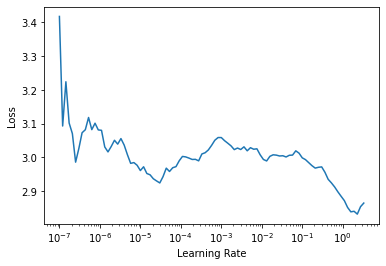

In [43]:
learn.lr_find()

In [44]:
#learn.fit_one_cycle(15, 8e-6)

epoch,train_loss,valid_loss,time
0,2.919586,2.970437,06:46
1,2.870926,2.860732,06:46
2,2.644171,2.666812,06:46
3,2.465414,2.456990,06:47
4,2.281298,2.276168,06:46
5,2.114491,2.117193,06:48
6,1.965708,1.978764,06:47
7,1.873374,1.865566,06:49
8,1.746938,1.779134,06:48
9,1.699808,1.716790,06:46


In [46]:
learn.summary()

EmbeddingDotBias (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 50             
Embedding                                 2671250    True      
Embedding                                 500050     True      
____________________________________________________________________________
                     64 x 1              
Embedding                                 53425      True      
Embedding                                 10001      True      
____________________________________________________________________________

Total params: 3,234,726
Total trainable params: 3,234,726
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7ff331d04af0>
Loss function: FlattenedLoss of MSELoss()

Model unfrozen

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCallback

In [45]:
#save_pickle("save/collab_baseline.pkl", learn)

# Exploratory data analysis

# Predicting average book rating using only book info

We are going to leverage random forest to help us in this task.

## Feature engineering

## Info in title

In [16]:
import re
import pandas as pd

In [17]:
def extract_series(title):
    matches = re.search(r'^(?P<Title>.+)\s\((?P<Series>.+), #(?P<Number>\d)\)$', title)
    if matches is None:
        series = None
        number = 1
    else:
        title = matches.group('Title')
        series = matches.group('Series')
        number = matches.group('Number')
    return title, series, number

In [18]:
title_data = book_data['title'].apply(extract_series).apply(pd.Series)
title_data.columns = ['title', 'series', 'volume_number']

In [19]:
title_data

,title,series,volume_number
0,The Hunger Games,The Hunger Games,1
1,Harry Potter and the Sorcerer's Stone,Harry Potter,1
2,Twilight,Twilight,1
3,To Kill a Mockingbird,None,1
4,The Great Gatsby,None,1
...,...,...,...
9995,Bayou Moon,The Edge,2
9996,Means of Ascent,The Years of Lyndon Johnson,2
9997,The Mauritius Command,None,1
9998,Cinderella Ate My Daughter: Dispatches from th...,None,1


In [20]:
book_data = book_data.drop('title', axis=1)
book_data = pd.concat([book_data, title_data], axis=1)

In [21]:
book_data.iloc[:3,-3:]

,title,series,volume_number
0,The Hunger Games,The Hunger Games,1
1,Harry Potter and the Sorcerer's Stone,Harry Potter,1
2,Twilight,Twilight,1


## Leveraging tags

In [22]:
import numpy as np

In [23]:
nb_tags, _ = len(tags_data.tag_id.unique()), tags_data.tag_id.max() + 1 # +1 since first id is 0
nb_tags, _

(34252, 34252)

Don't think there is any hole.

In [24]:
tags_data.head(5)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [25]:
tags_data.tail(5)

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


**We are drowning in tags!**
Users can create their own tags, which doesn't help. Instead we will use the tags provided by goodbooks genres, namely [these ones](https://www.goodreads.com/genres)

In [26]:
genres = ["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
genres_tags = [genre.lower().replace(" and ", "-").replace(" ", "-").replace("'s", "") for genre in genres]

In [27]:
len(genres), len(tags_data[tags_data['tag_name'].isin(genres_tags)])

(40, 40)

In [28]:
nb_genres = len(genres)

We now have all the genres! Let's filter the tags and transform the count into True-False.

In [29]:
genres_tag_ids = tags_data[tags_data['tag_name'].isin(genres_tags)].tag_id

In [30]:
bookgenres_data = booktags_data[booktags_data['tag_id'].isin(genres_tag_ids)]

In [31]:
tag_genre_map = {tag: genres_tags.index(tags_data.loc[tag].tag_name) for tag in genres_tag_ids}

In [32]:
grouped_genres_counts = bookgenres_data.groupby('goodreads_book_id').agg(lambda x: x.tolist())
grouped_genres_counts.head(1)

,tag_id,count
goodreads_book_id,,
1,"[11305, 33114, 11743, 6857, 7457, 22973, 20939...","[37174, 12716, 9954, 1560, 958, 673, 465, 334,..."


In [33]:
def one_hot_from_genre_count_list(tags):
    one_hot = np.repeat(0, nb_genres)
    genres = [tag_genre_map[tag] for tag in tags]
    one_hot[genres] = 1
    return pd.Series(one_hot)

In [34]:
one_hot = grouped_genres_counts.apply(lambda x: one_hot_from_genre_count_list(x['tag_id']), axis=1)
one_hot.columns = genres

In [35]:
one_hot

,Art,Biography,Business,Chick Lit,Children's,Christian,Classics,Comics,Contemporary,Cookbooks,...,Romance,Science,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult
goodreads_book_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31538647,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31845516,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
32075671,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [36]:
#one_hot.to_csv('save/genres_one_hot.csv')

In [37]:
one_hot.reset_index(inplace=True)

In [38]:
book_with_genres = book_data.merge(one_hot)

In [39]:
book_with_genres

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,Romance,Science,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,1,0,1,0,1,0,0,1,0,1
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,0,0,0,0,0,0,0,0,0,1
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,0,0,1,0,0,0,0,0,0,1
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,0,0,0,0,0,0,0,0,0,1
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,1,0,0,0,0,0,0,0,0,0
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,0,0,0,0,0,0,0,0,0,0
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,0,0,0,0,0,0,0,0,0,0
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#book_with_genres.to_csv('save/book_w_genres.csv', index=False)

In [40]:
book_complete_data = ratings_data.merge(book_with_genres)

In [41]:
book_complete_data

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,Romance,Science,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult
0,1,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
1,11,258,3,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
2,143,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
3,242,258,5,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
4,325,258,4,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976474,36773,9548,5,30839185,30839185,51437887,4,,NaN,L.J. Shen,...,1,0,0,0,1,0,0,0,0,1
5976475,50673,9548,4,30839185,30839185,51437887,4,,NaN,L.J. Shen,...,1,0,0,0,1,0,0,0,0,1
5976476,45213,9548,3,30839185,30839185,51437887,4,,NaN,L.J. Shen,...,1,0,0,0,1,0,0,0,0,1
5976477,12872,9548,4,30839185,30839185,51437887,4,,NaN,L.J. Shen,...,1,0,0,0,1,0,0,0,0,1


In [69]:
#book_complete_data.to_csv('save/book_complete.csv', index=False)

### Handling strings and missing data

In [1]:
from fastai.tabular.all import *

In [43]:
procs = [Categorify, FillMissing]

In [44]:
dep_var = 'rating'

In [45]:
continuous, categorical = cont_cat_split(book_complete_data, 2, dep_var=dep_var)

In [46]:
continuous

['user_id',
 'book_id',
 'goodreads_book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn13',
 'original_publication_year',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5']

In [47]:
categorical

['isbn',
 'authors',
 'original_title',
 'language_code',
 'image_url',
 'small_image_url',
 'title',
 'series',
 'volume_number',
 'Art',
 'Biography',
 'Business',
 'Chick Lit',
 "Children's",
 'Christian',
 'Classics',
 'Comics',
 'Contemporary',
 'Cookbooks',
 'Crime',
 'Ebooks',
 'Fantasy',
 'Fiction',
 'Gay and Lesbian',
 'Graphic Novels',
 'Historical Fiction',
 'History',
 'Horror',
 'Humor and Comedy',
 'Manga',
 'Memoir',
 'Music',
 'Mystery',
 'Nonfiction',
 'Paranormal',
 'Philosophy',
 'Poetry',
 'Psychology',
 'Religion',
 'Romance',
 'Science',
 'Science Fiction',
 'Self Help',
 'Suspense',
 'Spirituality',
 'Sports',
 'Thriller',
 'Travel',
 'Young Adult']

In [49]:
msk = np.random.rand(len(book_complete_data)) < 0.3 # Only 10% for training for now (just to try out stuff)
train_idx = np.where(msk)[0]
valid_idx = np.where(~msk)[0]
splits = (list(train_idx), list(valid_idx))

In [50]:
book_tab = TabularPandas(book_complete_data, procs, categorical, continuous, y_names=dep_var, splits=splits)

In [51]:
len(book_tab.train), len(book_tab.valid)

(598375, 5378104)

In [52]:
book_tab.show(3)

,isbn,authors,original_title,language_code,image_url,small_image_url,title,series,volume_number,Art,Biography,Business,Chick Lit,Children's,Christian,Classics,Comics,Contemporary,Cookbooks,Crime,Ebooks,Fantasy,Fiction,Gay and Lesbian,Graphic Novels,Historical Fiction,History,Horror,Humor and Comedy,Manga,Memoir,Music,Mystery,Nonfiction,Paranormal,Philosophy,Poetry,Psychology,Religion,Romance,Science,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult,isbn13_na,original_publication_year_na,user_id,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,rating
15,143034901,"Carlos Ruiz Zafón, Lucia Graves",La sombra del viento,eng,https://images.gr-assets.com/books/1344545047m/1232.jpg,https://images.gr-assets.com/books/1344545047s/1232.jpg,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",#na#,1,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,False,False,493,258,1232,1232,3209783,279,9.780143e+12,2001.0,4.24,263685,317554,24652,4789,11769,42214,101612,157170,1
17,143034901,"Carlos Ruiz Zafón, Lucia Graves",La sombra del viento,eng,https://images.gr-assets.com/books/1344545047m/1232.jpg,https://images.gr-assets.com/books/1344545047s/1232.jpg,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",#na#,1,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,False,False,1252,258,1232,1232,3209783,279,9.780143e+12,2001.0,4.24,263685,317554,24652,4789,11769,42214,101612,157170,5
28,143034901,"Carlos Ruiz Zafón, Lucia Graves",La sombra del viento,eng,https://images.gr-assets.com/books/1344545047m/1232.jpg,https://images.gr-assets.com/books/1344545047s/1232.jpg,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",#na#,1,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,False,False,1843,258,1232,1232,3209783,279,9.780143e+12,2001.0,4.24,263685,317554,24652,4789,11769,42214,101612,157170,5


In [53]:
book_tab.items.head(3)

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,...,Science Fiction,Self Help,Suspense,Spirituality,Sports,Thriller,Travel,Young Adult,isbn13_na,original_publication_year_na
15,493,258,1,1232,1232,3209783,279,1640,9.780143e+12,642,...,1,1,2,1,1,2,1,1,1,1
17,1252,258,5,1232,1232,3209783,279,1640,9.780143e+12,642,...,1,1,2,1,1,2,1,1,1,1
28,1843,258,5,1232,1232,3209783,279,1640,9.780143e+12,642,...,1,1,2,1,1,2,1,1,1,1


Under the hood, everything is numerical

In [2]:
save_path = Path()/'save/book_tab_30.pkl'

In [55]:
#save_pickle(save_path, book_tab)

### Creating the Random Forest

In [3]:
#book_tab = load_pickle(save_path)

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
def rf(xs, y, n_estimators=40, max_samples=100_000,
       max_features=0.5, min_samples_leaf=15, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True, random_state=42).fit(xs, y)

In [6]:
xs, y = book_tab.train.xs, book_tab.train.y
valid_xs, valid_y = book_tab.valid.xs, book_tab.valid.y

In [8]:
m = rf(xs, y)

In [7]:
from sklearn.metrics import mean_squared_error as mse

In [8]:
def m_mse(model, xs, y): return mse(y, m.predict(xs))

In [11]:
m_mse(m, xs, y), m_mse(m, valid_xs, valid_y)

(0.891656186367123, 0.907484106430971)

Not bad. Let's take a look at the most important variables.

In [52]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [13]:
rf_feat_importance(m, xs)[:20]

,cols,imp
59,average_rating,0.292464
51,user_id,0.216222
0,isbn,0.026474
1,authors,0.026304
63,ratings_1,0.024457
55,work_id,0.024266
6,title,0.024026
56,books_count,0.023156
62,work_text_reviews_count,0.023007
67,ratings_5,0.022867


Some columns such as average_rating, ratings_1 etc. seem to be very important.
Not sure if this is considered data leakage but for our rating prediction, **this won't generalize well** (new books won't have many ratings etc.)
Therefore we will remove them.

In [9]:
reg = re.compile('.*rating.*')
indep_var = [v for v in xs.columns if not reg.match(v)]

xs = xs[indep_var]
valid_xs = valid_xs[indep_var]

In [15]:
m = rf(xs, y)

In [16]:
m_mse(m, xs, y), m_mse(m, valid_xs, valid_y)

(0.8998591937612521, 0.9148011044442642)

Around the same results (a bit worse).

In [17]:
xs.columns

Index(['isbn', 'authors', 'original_title', 'language_code', 'image_url',
       'small_image_url', 'title', 'series', 'volume_number', 'Art',
       'Biography', 'Business', 'Chick Lit', 'Children's', 'Christian',
       'Classics', 'Comics', 'Contemporary', 'Cookbooks', 'Crime', 'Ebooks',
       'Fantasy', 'Fiction', 'Gay and Lesbian', 'Graphic Novels',
       'Historical Fiction', 'History', 'Horror', 'Humor and Comedy', 'Manga',
       'Memoir', 'Music', 'Mystery', 'Nonfiction', 'Paranormal', 'Philosophy',
       'Poetry', 'Psychology', 'Religion', 'Romance', 'Science',
       'Science Fiction', 'Self Help', 'Suspense', 'Spirituality', 'Sports',
       'Thriller', 'Travel', 'Young Adult', 'isbn13_na',
       'original_publication_year_na', 'user_id', 'book_id',
       'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn13',
       'original_publication_year', 'work_text_reviews_count'],
      dtype='object')

We have a bunch of id columns that mean around the same thing. Let's only keep the book_id, see how it goes.

In [22]:
len(book_data.work_id.unique()), len(book_data.goodreads_book_id.unique()), len(book_data.best_book_id.unique()), len(book_data.isbn.unique()), len(book_data.isbn13.unique()) + book_data.isbn13.isna().sum() - 1

(10000, 10000, 10000, 9301, 9738)

I don't know why isbn and isbn13 are not entirely unique but I will still remove them.

In [10]:
to_drop = ['work_id', 'goodreads_book_id', 'best_book_id', 'isbn', 'isbn13', 'isbn13_na']

In [24]:
m = rf(xs.drop(to_drop, axis=1), y)
m_mse(m, xs.drop(to_drop, axis=1), y), m_mse(m, valid_xs.drop(to_drop, axis=1), valid_y)

(0.9010342313772932, 0.9153944810279022)

In [11]:
xs = xs.drop(to_drop, axis=1)
valid_xs = valid_xs.drop(to_drop, axis=1)

Again, not much of a drop and our model is simpler to use at inference time.

**We already have a better model than our baseline**

### Keeping the important features

In [26]:
imp = rf_feat_importance(m, xs)

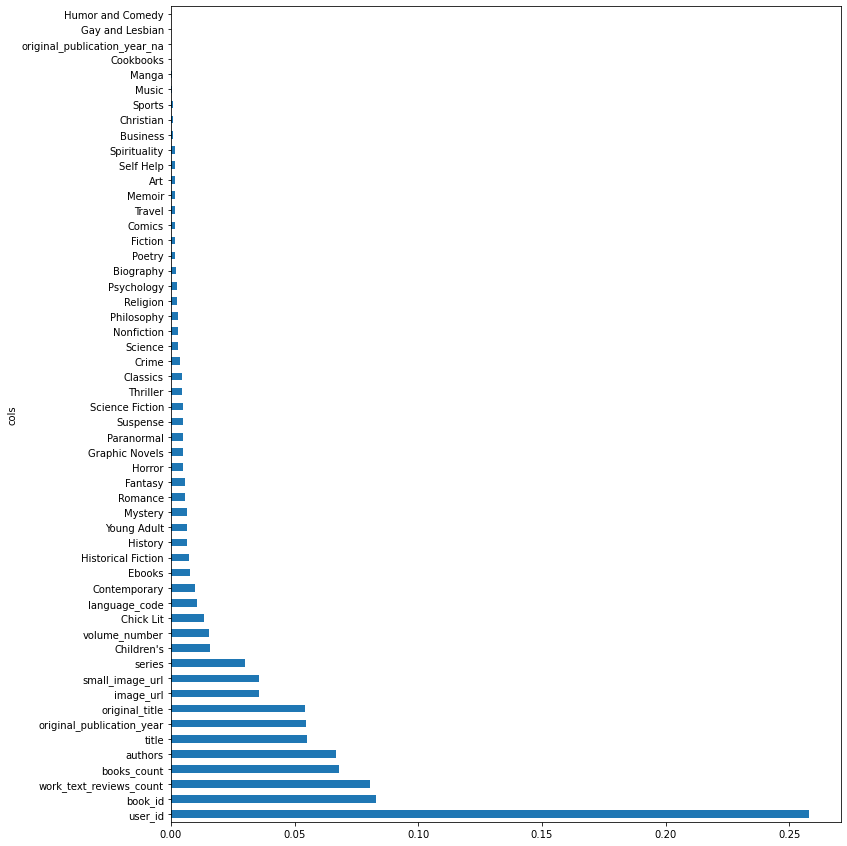

In [27]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,15), legend=False)

plot_fi(imp);

In [28]:
len(xs.columns)

54

We have 54 features for now, let's see if we can reduce this.

In [29]:
%%time

importances = np.arange(0.001, 0.01, step = 0.0001)
scores = []
nb_cols = []

for importance in importances:
    to_keep = imp[imp.imp > importance].cols
    len(to_keep), len(imp.cols)
    xs_imp = xs[to_keep]
    valid_xs_imp = valid_xs[to_keep]
    nb_cols.append(len(xs_imp.columns))
    m = rf(xs_imp, y)
    score = m_mse(m, xs_imp, y), m_mse(m, valid_xs_imp, valid_y)
    scores.append(score[1])

CPU times: user 1h 42min 41s, sys: 2min 4s, total: 1h 44min 45s
Wall time: 21min 29s


In [30]:
order = np.argsort(scores)

In [31]:
importances[order]

array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0027, 0.0023, 0.0021,
       0.002 , 0.0022, 0.0019, 0.0016, 0.0015, 0.0018, 0.0017, 0.0024,
       0.0025, 0.0039, 0.0044, 0.0043, 0.0042, 0.0041, 0.004 , 0.0038,
       0.0026, 0.0045, 0.0031, 0.0035, 0.0029, 0.0037, 0.0034, 0.0033,
       0.0032, 0.0036, 0.003 , 0.0028, 0.0046, 0.0047, 0.0048, 0.0049,
       0.0058, 0.0057, 0.0056, 0.0055, 0.0054, 0.0053, 0.0052, 0.005 ,
       0.0051, 0.0062, 0.0061, 0.0063, 0.0059, 0.006 , 0.0064, 0.0071,
       0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0076, 0.0077,
       0.0072, 0.0074, 0.0075, 0.0073, 0.0095, 0.0094, 0.0093, 0.0092,
       0.0091, 0.009 , 0.0089, 0.0088, 0.0087, 0.0086, 0.0084, 0.0083,
       0.0082, 0.0081, 0.008 , 0.0079, 0.0078, 0.0085, 0.0098, 0.0096,
       0.0097, 0.0099])

In [32]:
np.array(scores)[order]

array([0.91549716, 0.91549716, 0.91549716, 0.91549716, 0.91549716,
       0.91553948, 0.91557127, 0.91557127, 0.91557127, 0.91557127,
       0.91557127, 0.91562159, 0.9156826 , 0.91569515, 0.91569515,
       0.91574632, 0.91574632, 0.91574899, 0.91574899, 0.91574899,
       0.91574899, 0.91574899, 0.91574899, 0.91574899, 0.91575091,
       0.9158592 , 0.91586882, 0.91586882, 0.91586882, 0.91586882,
       0.91586882, 0.91586882, 0.91586882, 0.91586882, 0.91586882,
       0.91592495, 0.91595043, 0.91595043, 0.91595043, 0.91598621,
       0.91605177, 0.91605177, 0.91634649, 0.91634649, 0.91634649,
       0.91634649, 0.91634649, 0.91634649, 0.91634649, 0.91651318,
       0.91651318, 0.91651318, 0.91651318, 0.91651318, 0.91659603,
       0.91690904, 0.91690904, 0.91690904, 0.91690904, 0.91690904,
       0.91690904, 0.91690904, 0.91708493, 0.91708493, 0.91708493,
       0.91708493, 0.91708493, 0.91708493, 0.91715077, 0.91715077,
       0.91715077, 0.91715077, 0.91715077, 0.91715077, 0.91715

In [33]:
np.array(nb_cols)[order]

array([45, 45, 45, 45, 45, 33, 36, 36, 36, 36, 36, 42, 44, 39, 39, 35, 35,
       30, 30, 30, 30, 30, 30, 30, 34, 29, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 32, 28, 28, 28, 26, 22, 22, 23, 23, 23, 23, 23, 23, 23, 21, 21,
       21, 21, 21, 20, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 15, 15, 15, 15])

In [52]:
considerations = np.where(np.array(scores)[order] >= 0.916)[0][:3]

In [53]:
np.array(scores)[order][considerations]

array([0.91605177, 0.91605177, 0.91634649])

In [54]:
importances[order][considerations]

array([0.0058, 0.0057, 0.0056])

In [55]:
np.array(nb_cols)[order][considerations]

array([22, 22, 23])

I think the 0.0058 cut-off is a good tradeoff between model simplicity (22 features) and performance.

In [56]:
to_keep = imp[imp.imp > 0.0058].cols
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [57]:
m = rf(xs_imp, y)
m_mse(m, xs_imp, y), m_mse(m, valid_xs_imp, valid_y)

(0.9018481104556828, 0.9160517671691011)

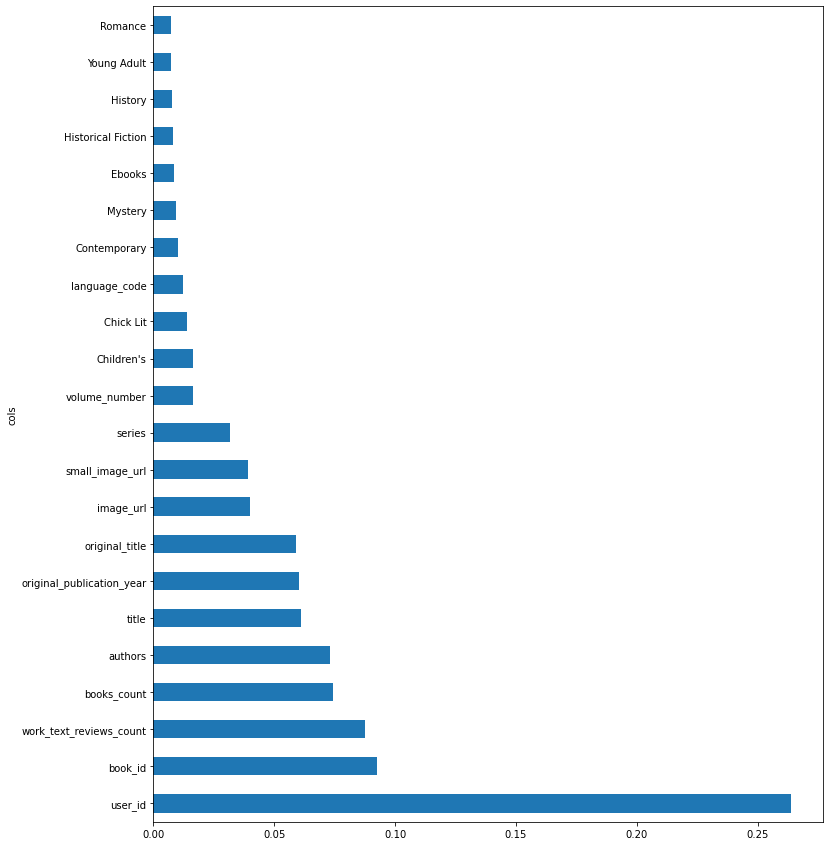

In [58]:
plot_fi(rf_feat_importance(m, xs_imp));

In [61]:
#xs_imp.columns.to_frame().to_csv('save/important_features.csv', index=False)

In [19]:
#keep = pd.read_csv('save/important_features.csv')['0']
#xs_imp = xs[keep]
#valid_xs_imp = valid_xs[keep]

We removed lots of genres. I thought that some less popular genres were underreprenseted considering the fact I use 30% of the data for training and baggings of only 40 trees with 100 000 bootstrapped samples.

To check if I didn't remove anything too crazy, I retrained with no bootstraps the same size as the training set and using the validation set (70% of the data).

In [21]:
m = rf(valid_xs_imp, valid_y, max_samples=None)
m_mse(m, xs_imp, y), m_mse(m, valid_xs_imp, valid_y)

(0.9378334164954757, 0.8084376219387532)

In [22]:
m = rf(valid_xs, valid_y, max_samples=None)
m_mse(m, xs, y), m_mse(m, valid_xs, valid_y)

(0.936724016889222, 0.8077387176633147)

Remember now the validation set is our previous training set.
We have very slightly worse MSE using only the important features, so we can keep them as is.

We are left with a few very well-known genres and some meta information about the book.

### Similar columns

In [23]:
from scipy.cluster import hierarchy as hc

In [24]:
def cluster_columns(df, figsize=(15,15), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

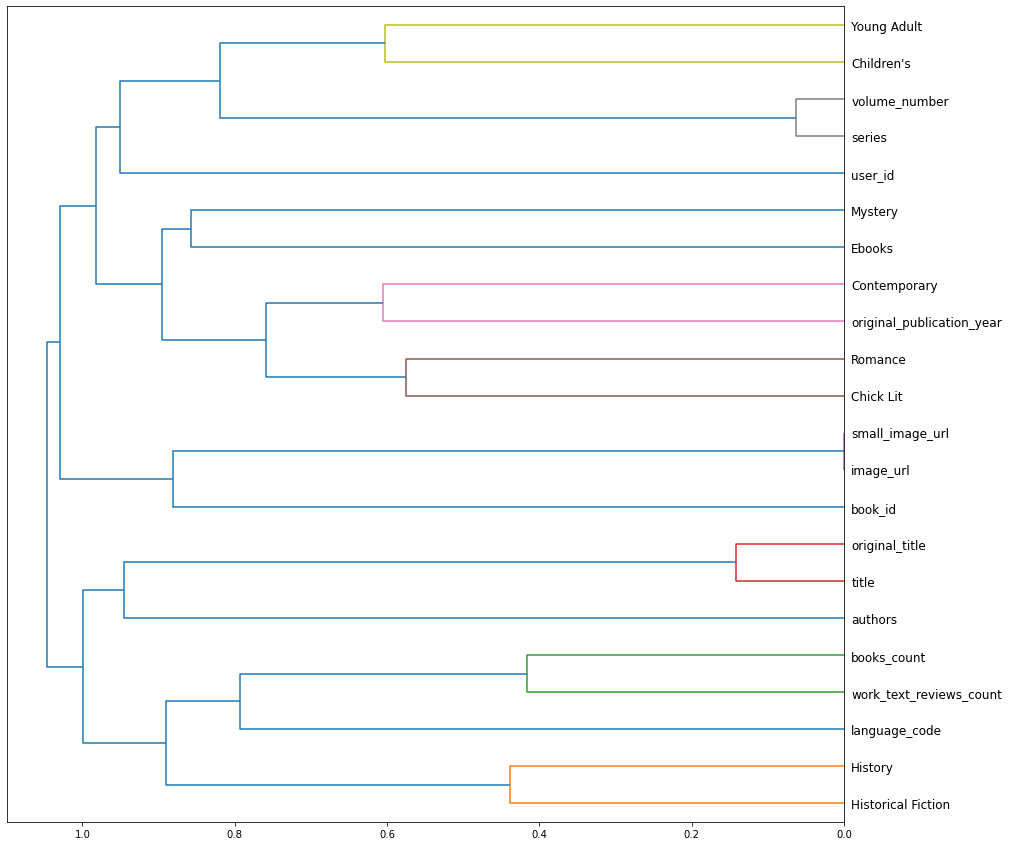

In [25]:
cluster_columns(xs_imp)

Small_image_url and image_url, volume_number and series, title and original title are pretty similar in their behavior.
Let's see what happens if we remove one of each pair.

In [28]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True, random_state=42)
    m.fit(df, y)
    return m.oob_score_

oob_score_ is the same as R² metric. 1 is good (perfect model, explains 100% of the variance in the dependent variable), 0 is bad (no variance explained at all).

In [29]:
get_oob(xs_imp)

0.06205837648613244

Well that is not a great R² score. Meaning our model is either false or doesn't explain much of the variance in the dependent variable.

In [30]:
{c: get_oob(xs_imp.drop(c , axis=1)) for c in (
    'small_image_url', 'image_url',
    'title', 'original_title',
    'volume_number', 'series',
)}

{'small_image_url': 0.06186073609483034,
 'image_url': 0.06186073609483034,
 'title': 0.06182451504816133,
 'original_title': 0.061881995856606364,
 'volume_number': 0.061306470896700827,
 'series': 0.061779038256912444}

Let's see what droping small_image_url, original_title, series does to the R² score.

In [35]:
to_drop = ['small_image_url', 'original_title', 'series']
get_oob(xs_imp.drop(to_drop, axis=1))

0.06158538289406179

In [36]:
m = rf(xs_imp.drop(to_drop, axis=1), y)
m_mse(m, xs_imp.drop(to_drop, axis=1), y), m_mse(m, valid_xs_imp.drop(to_drop, axis=1), valid_y)

(0.9029268559842787, 0.9172389893679362)

I feel like dropping series resolves in an important loss of information. Let's see if keeping it makes things better.

In [37]:
to_drop.remove('series')
get_oob(xs_imp.drop(to_drop, axis=1))

0.061878241208393026

In [38]:
m = rf(xs_imp.drop(to_drop, axis=1), y)
m_mse(m, xs_imp.drop(to_drop, axis=1), y), m_mse(m, valid_xs_imp.drop(to_drop, axis=1), valid_y)

(0.9024575402362844, 0.9168282339740588)

Doesn't change much keeping it, so I'll remove it.

Also Ebooks isn't a genre and shouldn't be here, so I'll drop it.

In [59]:
to_drop += ['series', 'Ebooks']

In [60]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [71]:
m = rf(xs_final, y)
m_mse(m, xs_final, y), m_mse(m, valid_xs_final, valid_y)

(0.902641825277883, 0.9169493563012246)

In [72]:
#save_pickle('save/rf_simple_0_916.pkl', m)

In [61]:
#xs_final.columns.to_series().to_csv('save/final_features.csv', index=False, header=False)

Let's evaluate the model on the validation set with more trees and bigger samples see what we can get.

In [63]:
m = rf(valid_xs_final, valid_y, n_estimators=100, max_samples=None)
m_mse(m, xs_final, y), m_mse(m, valid_xs_final, valid_y)

(0.9362375162117882, 0.8067073452351634)

Weirdly we have worse performance than our simpler model.

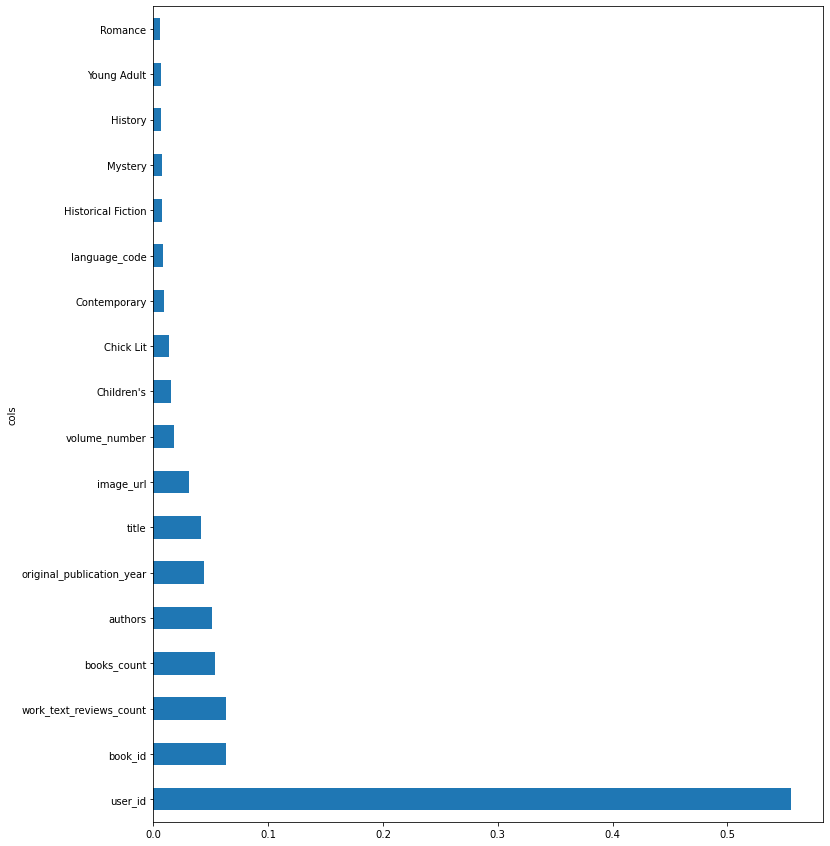

In [65]:
plot_fi(rf_feat_importance(m, xs_final));

In [70]:
#save_pickle('save/rf_complex_0_936.pkl', m)

I think we are done removing redundant or irrelevant columns.

In [69]:
len(xs_final.columns), len(book_tab.all_col_names)

(18, 69)

### Further feature engineering

In [83]:
book_data[['title', 'original_title']]

,title,original_title
0,"The Hunger Games (The Hunger Games, #1)",The Hunger Games
1,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",Harry Potter and the Philosopher's Stone
2,"Twilight (Twilight, #1)",Twilight
3,To Kill a Mockingbird,To Kill a Mockingbird
4,The Great Gatsby,The Great Gatsby
...,...,...
9995,"Bayou Moon (The Edge, #2)",Bayou Moon
9996,"Means of Ascent (The Years of Lyndon Johnson, #2)",Means of Ascent
9997,The Mauritius Command,The Mauritius Command
9998,Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture,Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture


Seems like the title is basically the title + the series + the volume in this series.

Let's see if we can split into features:
- the title
- the series
- the volume number (1 for those not in a series? To be debated)

# Image

In [66]:
xs_no_image = xs_imp.drop(['small_image_url', 'image_url'], axis=1)
valid_xs_no_image = valid_xs_imp.drop(['small_image_url', 'image_url'], axis=1)

In [67]:
m = rf(xs_no_image, y)

In [68]:
m_mse(m, xs_no_image, y), m_mse(m, valid_xs_no_image, valid_y)

(0.025713554795205953, 0.04729254731966704)

An image url shoudln't have any predictive power, even though removing it makes things very slightly worse.
Perhaps this is related to the way it is encoded. (Increasing int for encoding and dataset ordered in a particular way may give extract a new feature inheritent from the ordering).

**Let's see if an image regressor would have any predictive power**

In [69]:
from fastai.vision.all import *

In [70]:
image_data = book_data[['image_url', 'average_rating']].copy()

In [71]:
im_dir = Path()/'save/images'
im_dir.mkdir(parents=True, exist_ok=True)

In [72]:
image_data['path'] = im_dir.as_posix() + '/' + book_data['title'] + '.jpg'

In [73]:
image_data

,image_url,average_rating,path
0,https://images.gr-assets.com/books/1447303603m/2767052.jpg,4.34,"save/images/The Hunger Games (The Hunger Games, #1).jpg"
1,https://images.gr-assets.com/books/1474154022m/3.jpg,4.44,"save/images/Harry Potter and the Sorcerer's Stone (Harry Potter, #1).jpg"
2,https://images.gr-assets.com/books/1361039443m/41865.jpg,3.57,"save/images/Twilight (Twilight, #1).jpg"
3,https://images.gr-assets.com/books/1361975680m/2657.jpg,4.25,save/images/To Kill a Mockingbird.jpg
4,https://images.gr-assets.com/books/1490528560m/4671.jpg,3.89,save/images/The Great Gatsby.jpg
...,...,...,...
9995,https://images.gr-assets.com/books/1307445460m/7130616.jpg,4.09,"save/images/Bayou Moon (The Edge, #2).jpg"
9996,https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png,4.25,"save/images/Means of Ascent (The Years of Lyndon Johnson, #2).jpg"
9997,https://images.gr-assets.com/books/1455373531m/77431.jpg,4.35,save/images/The Mauritius Command.jpg
9998,https://images.gr-assets.com/books/1279214118m/8565083.jpg,3.65,save/images/Cinderella Ate My Daughter: Dispatches from the Frontlines of the New Girlie-Girl Culture.jpg


In [74]:
import urllib.request

In [75]:
def download_images(urls, im_paths):
    for url, im_path in zip(urls, im_paths):
        try:
            urllib.request.urlretrieve(url, filename=f"{im_path}")
            filename += 1
        except Exception as exc:
            print(f"Exception occued while downloading image from url {url}, path: {im_path} -- {str(exc)}")

In [76]:
#download_images(image_data.image_url, image_data.path)

Some variables seem to indicate pretty much the same thing, such as ids, title and original_title, images etc.
We will try to remove redundant features.

In [77]:
def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()